**Drive set up

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from google.colab import files


** Data set ready **

In [8]:
!cp /content/drive/MyDrive/Data/data_loader.py /content

In [9]:
from data_loader import DataLoader

In [10]:
image_width, image_height, image_Nchannels = 32, 32, 3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
!cp /content/drive/MyDrive/Data/data_batch_1 /content

In [12]:
!cp /content/drive/MyDrive/Data/data_batch_2 /content

In [13]:
!cp /content/drive/MyDrive/Data/data_batch_3 /content

In [14]:
!cp /content/drive/MyDrive/Data/data_batch_4 /content

In [15]:
!cp /content/drive/MyDrive/Data/data_batch_5 /content

In [16]:
!cp /content/drive/MyDrive/Data/batches.meta /content

In [17]:
!cp /content/drive/MyDrive/Data/test_batch /content

**Read train data and test data**

In [18]:
X_train, y_train = DataLoader.load_batch('data_batch')
X_test, y_test = DataLoader.load_batch('test_batch', Nbatches=1)

In [19]:
print('X_test.shape =', X_test.shape, 'data type:', X_test.dtype)
print('y_test.shape =', y_test.shape, 'data type:', y_test.dtype)

X_test.shape = (10000, 32, 32, 3) data type: float32
y_test.shape = (10000,) data type: uint8


In [20]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.8.0'

In [21]:
keras.__version__

'2.8.0'

In [22]:
print('X_train.shape =', X_train.shape, 'data type:', X_train.dtype)
print('y_train.shape =', y_train.shape, 'data type:', y_train.dtype)

X_train.shape = (50000, 32, 32, 3) data type: float32
y_train.shape = (50000,) data type: uint8


In [23]:
import torch
import torchvision
import os
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

**Plot function**

In [24]:
def plotimages(image,label):
  train_images = image
  plt.figure(figsize=(10,10))
  for i in range(20):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(train_images[i], cmap=plt.cm.binary)
      plt.xlabel(class_names[label[i]])
  plt.show()

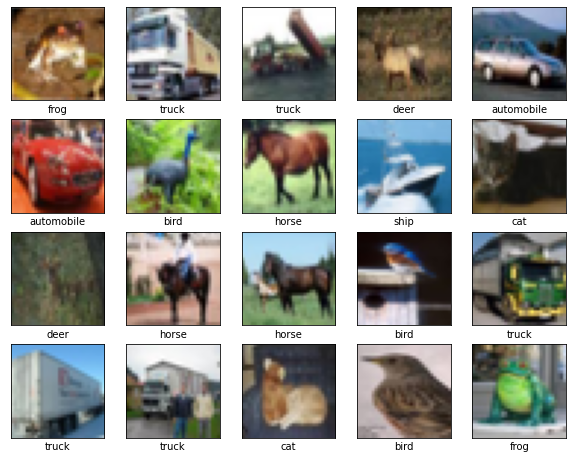

In [25]:
plotimages(X_train,y_train)

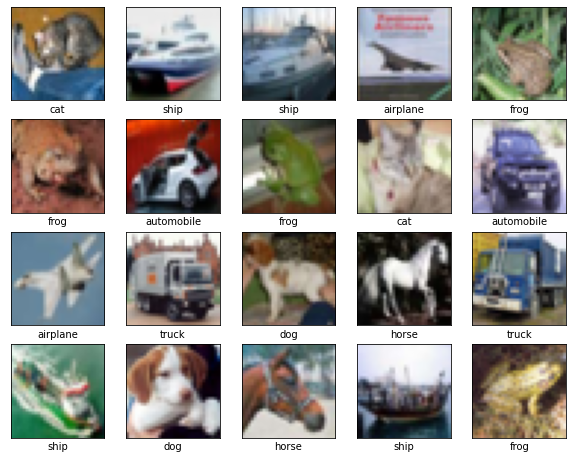

In [26]:
plotimages(X_test,y_test)

** Split data **

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.15, random_state= 8)

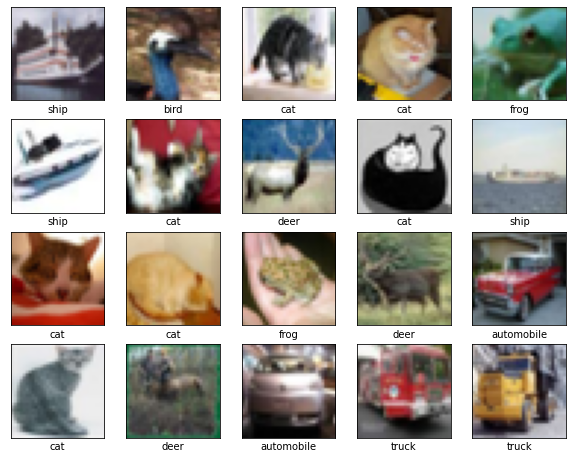

In [28]:
plotimages(X_val,y_val)

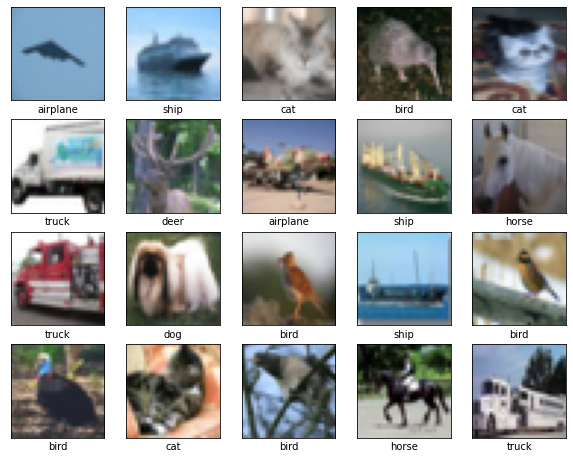

In [29]:
plotimages(X_train,y_train)

**ANN Model**

In [30]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[32, 32, 3]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


In [32]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [33]:
weights.shape

(3072, 300)

In [34]:
biases.shape

(300,)

In [35]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [91]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val))

Epoch 1/100
1329/1329 [==============================] - 12s 8ms/step - loss: 1.8959 - accuracy: 0.3204 - val_loss: 2.3058 - val_accuracy: 0.2029
Epoch 2/100
1329/1329 [==============================] - 11s 8ms/step - loss: 1.7156 - accuracy: 0.3918 - val_loss: 1.7680 - val_accuracy: 0.3623
Epoch 3/100
1329/1329 [==============================] - 11s 8ms/step - loss: 1.6349 - accuracy: 0.4219 - val_loss: 1.6613 - val_accuracy: 0.3991
Epoch 4/100
1329/1329 [==============================] - 10s 8ms/step - loss: 1.5793 - accuracy: 0.4427 - val_loss: 1.7001 - val_accuracy: 0.3981
Epoch 5/100
1329/1329 [==============================] - 10s 8ms/step - loss: 1.5361 - accuracy: 0.4574 - val_loss: 1.5966 - val_accuracy: 0.4313
Epoch 6/100
1329/1329 [==============================] - 10s 8ms/step - loss: 1.5004 - accuracy: 0.4699 - val_loss: 1.7775 - val_accuracy: 0.3701
Epoch 7/100
1329/1329 [==============================] - 10s 8ms/step - loss: 1.4663 - accuracy: 0.4843 - val_loss: 1.5371 -

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 2.4147 - accuracy: 0.1099


[2.4147138595581055, 0.10989999771118164]

In [37]:
X_new = X_test[:300]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.17, 0.05, 0.11, ..., 0.15, 0.05, 0.12],
       [0.17, 0.04, 0.07, ..., 0.16, 0.04, 0.14],
       [0.13, 0.04, 0.08, ..., 0.17, 0.04, 0.12],
       ...,
       [0.19, 0.03, 0.07, ..., 0.18, 0.03, 0.13],
       [0.15, 0.03, 0.11, ..., 0.14, 0.04, 0.14],
       [0.12, 0.05, 0.1 , ..., 0.14, 0.05, 0.12]], dtype=float32)

In [104]:
y_pred = model.predict(X_new)
y_pred

array([[5.6819129e-03, 4.2787012e-01, 7.6722907e-04, ..., 8.8359375e-05,
        2.0156957e-01, 7.4377494e-06],
       [9.6117263e-04, 2.3531534e-03, 1.4118947e-06, ..., 4.0831719e-07,
        9.9624783e-01, 4.3597096e-04],
       [6.9789076e-01, 9.0970263e-02, 3.0130512e-04, ..., 1.2204016e-01,
        8.2355276e-02, 6.3611977e-03],
       ...,
       [4.5299977e-01, 1.2977986e-04, 3.8334869e-09, ..., 1.7429530e-15,
        5.4686934e-01, 1.5863675e-09],
       [9.9860793e-01, 2.4546569e-05, 2.9837867e-04, ..., 4.5543085e-09,
        9.1662497e-04, 8.3613272e-10],
       [1.8716059e-04, 3.3640392e-06, 9.8190778e-01, ..., 3.9181076e-03,
        6.4432487e-07, 3.0375462e-09]], dtype=float32)

In [38]:
model.save("my_keras_model.h5")

In [39]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
save_best_only=True)

In [111]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val),
callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1329/1329 [==============================] - 11s 8ms/step - loss: 0.3665 - accuracy: 0.8748 - val_loss: 2.5617 - val_accuracy: 0.4875
Epoch 2/100
1329/1329 [==============================] - 10s 7ms/step - loss: 0.3629 - accuracy: 0.8747 - val_loss: 2.3004 - val_accuracy: 0.5009
Epoch 3/100
1329/1329 [==============================] - 10s 7ms/step - loss: 0.3606 - accuracy: 0.8743 - val_loss: 2.1970 - val_accuracy: 0.5175
Epoch 4/100
1329/1329 [==============================] - 10s 7ms/step - loss: 0.3459 - accuracy: 0.8799 - val_loss: 3.6196 - val_accuracy: 0.4025
Epoch 5/100
1329/1329 [==============================] - 10s 7ms/step - loss: 0.3459 - accuracy: 0.8803 - val_loss: 3.5007 - val_accuracy: 0.4272
Epoch 6/100
1329/1329 [==============================] - 9s 7ms/step - loss: 0.3459 - accuracy: 0.8809 - val_loss: 2.2073 - val_accuracy: 0.5240
Epoch 7/100
1329/1329 [==============================] - 9s 7ms/step - loss: 0.3264 - accuracy: 0.8870 - val_loss: 3.1906 - v

In [40]:
hidden2 = model.layers[2]
weights, biases = hidden2.get_weights()

In [41]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [117]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val),
callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1329/1329 [==============================] - 11s 8ms/step - loss: 0.3480 - accuracy: 0.8796 - val_loss: 2.4202 - val_accuracy: 0.4924
Epoch 2/100
1329/1329 [==============================] - 11s 8ms/step - loss: 0.3436 - accuracy: 0.8808 - val_loss: 2.5482 - val_accuracy: 0.4905
Epoch 3/100
1329/1329 [==============================] - 10s 8ms/step - loss: 0.3367 - accuracy: 0.8833 - val_loss: 3.1627 - val_accuracy: 0.4292
Epoch 4/100
1329/1329 [==============================] - 10s 8ms/step - loss: 0.3336 - accuracy: 0.8848 - val_loss: 2.2251 - val_accuracy: 0.5205
Epoch 5/100
1329/1329 [==============================] - 11s 8ms/step - loss: 0.3237 - accuracy: 0.8900 - val_loss: 2.6815 - val_accuracy: 0.4747
Epoch 6/100
1329/1329 [==============================] - 11s 8ms/step - loss: 0.3129 - accuracy: 0.8942 - val_loss: 2.3028 - val_accuracy: 0.5167
Epoch 7/100
1329/1329 [==============================] - 11s 8ms/step - loss: 0.3094 - accuracy: 0.8951 - val_loss: 2.3179 -

In [42]:
input_ = keras.layers.Input(shape=X_train.shape[3:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [76]:
!mkdir -p saved_model_ANN
model.save('saved_model_ANN/kundu_ronjon-MLP')

INFO:tensorflow:Assets written to: saved_model/kundu_ronjon-MLP/assets


**CNN Model**

In [59]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3,
strides=1, padding="same",
activation="relu")

In [60]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [65]:
model = keras.models.Sequential([
keras.layers.Conv2D(64, 7, activation="relu", padding="same",
input_shape=[32, 32, 3]),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Flatten(),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(64, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(10, activation="softmax")
])

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        9472      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 256)        

In [70]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=2, 
                    validation_data=(X_val, y_val))

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1329/1329 [==============================] - 873s 656ms/step - loss: 1.7032 - accuracy: 0.3619 - val_loss: 1.5756 - val_accuracy: 0.4096
Epoch 2/2
1329/1329 [==============================] - 796s 599ms/step - loss: 1.5632 - accuracy: 0.4296 - val_loss: 1.3704 - val_accuracy: 0.4987


313/313 - 46s - loss: 1.3559 - accuracy: 0.5098 - 46s/epoch - 145ms/step


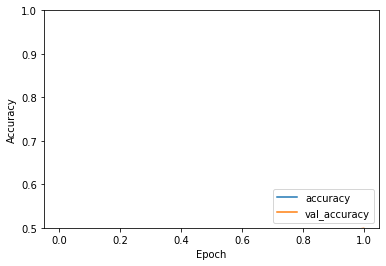

In [73]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [74]:
print(test_acc)

0.5098000168800354


In [75]:
!mkdir -p saved_model_CNN
model.save('saved_model_CNN/kundu_ronjon-CNN')

INFO:tensorflow:Assets written to: saved_model_CNN/kundu_ronjon-CNN/assets
